Notebook origin: https://r-graph-gallery.com/web-radar-chart-with-R.html
Data source: https://gist.github.com/slopp/ce3b90b9168f2f921784de84fa445651
About data: https://allisonhorst.github.io/palmerpenguins/

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.plot.coord import coord_polar


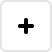
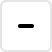
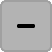
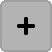
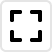
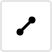
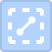
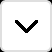
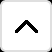
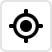
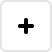
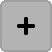
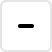
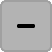
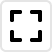
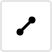
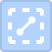
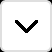
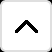
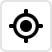

In [2]:
LetsPlot.setup_html()

In [3]:
penguins_df = pd.read_csv("https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv")
print(penguins_df.shape)
penguins_df.head()

(344, 9)


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
penguins_species_df = penguins_df.dropna().groupby("species")[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].mean().reset_index()
penguins_radar_df = pd.melt(penguins_species_df, id_vars="species")
penguins_radar_df.head()

,species,variable,value
0,Adelie,bill_length_mm,38.823973
1,Chinstrap,bill_length_mm,48.833824
2,Gentoo,bill_length_mm,47.568067
3,Adelie,bill_depth_mm,18.347260
4,Chinstrap,bill_depth_mm,18.420588


In [7]:
ggplot(penguins_radar_df) + \
    geom_path(aes('variable', 'value', color='species'))

In [10]:
ggplot(penguins_radar_df) + \
    geom_path(aes('variable', 'value', color='species'), flat=True) + \
    coord_polar(ylim=[0, penguins_radar_df['value'].max()])

In [12]:
ggplot(penguins_radar_df) + \
    geom_path(aes('variable', 'value', color='species'), flat=True, position='fill') + \
    coord_polar()